In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
color_pal=sns.color_palette()
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('product j_basemodel.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
sales_j= df.drop(['Product Name','Product Category','Month','Year'],axis=1)

In [4]:
sales_j.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales         60 non-null     int64  
 1   SMA_12months  48 non-null     float64
 2   SMA_6months   54 non-null     float64
 3   SMA_3months   57 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.3 KB


In [5]:
sales_j.head()

,Sales,SMA_12months,SMA_6months,SMA_3months
Month-Year,,,,
2019-01-01,63722,NaN,NaN,NaN
2019-02-01,76987,NaN,NaN,NaN
2019-03-01,99645,NaN,NaN,NaN
2019-04-01,68529,NaN,NaN,80118.0
2019-05-01,45119,NaN,NaN,81720.0


<Axes: title={'center': 'Product J'}, xlabel='Month-Year'>

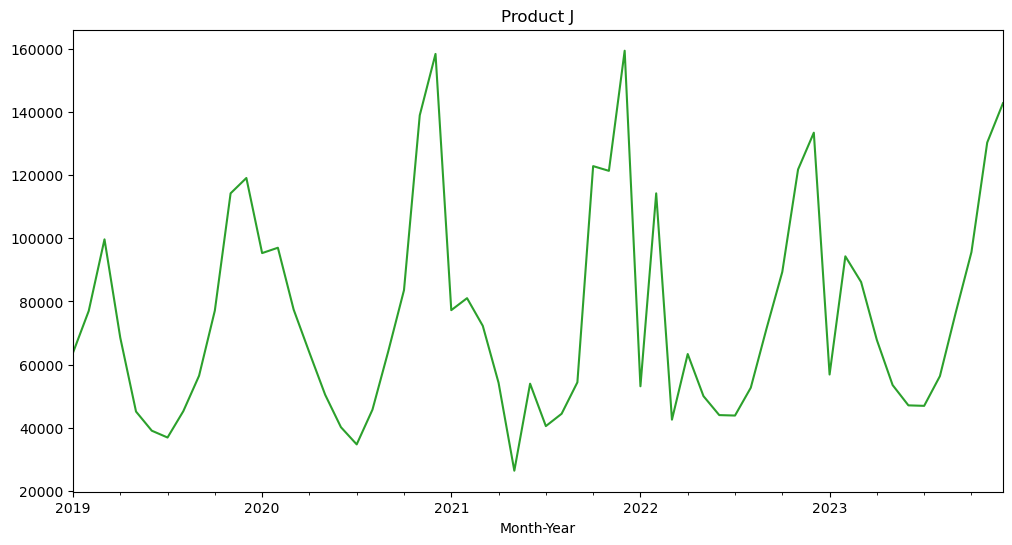

In [6]:
sales_j['Sales'].plot(figsize=(12,6),color=color_pal[2],title='Product J')

In [7]:
test_3= sales_j['Sales'].iloc[57:]
test_6=sales_j['Sales'].iloc[54:]
test_12=sales_j['Sales'].iloc[48:]

In [8]:
pred_3=sales_j['SMA_3months'].iloc[57:]
pred_6=sales_j['SMA_6months'].iloc[54:]
pred_12=sales_j['SMA_12months'].iloc[48:]

In [9]:
mae_3= mean_absolute_error(test_3,pred_3)
mse_3=mean_squared_error(test_3,pred_3)
mape_3= mean_absolute_percentage_error(test_3,pred_3)
rmse_3= np.sqrt(mean_squared_error(test_3,pred_3))

print(f'MAE - Simple Moving Averages_3 months: {mae_3:0.3f}')
print(f'MAPE - Simple Moving Averages_3 months: {mape_3:0.3f}')
print(f'MSE - Simple Moving Averages_3 months: {mse_3:0.3f}')
print(f'RMSE - Simple Moving Averages_3 months: {rmse_3:0.3f}')

MAE - Simple Moving Averages_3 months: 59239.667
MAPE - Simple Moving Averages_3 months: 0.471
MSE - Simple Moving Averages_3 months: 3802334966.333
RMSE - Simple Moving Averages_3 months: 61663.076


In [10]:
mae_6= mean_absolute_error(test_6,pred_6)
mse_6=mean_squared_error(test_6,pred_6)
mape_6= mean_absolute_percentage_error(test_6,pred_6)
rmse_6= np.sqrt(mean_squared_error(test_6,pred_6))

print(f'MAE - Simple Moving Averages_6 months: {mae_6:0.3f}')
print(f'MAPE - Simple Moving Averages_6 months: {mape_6:0.3f}')
print(f'MSE - Simple Moving Averages_6 months: {mse_6:0.3f}')
print(f'RMSE - Simple Moving Averages_6 months: {rmse_6:0.3f}')

MAE - Simple Moving Averages_6 months: 38168.667
MAPE - Simple Moving Averages_6 months: 0.379
MSE - Simple Moving Averages_6 months: 2204473209.333
RMSE - Simple Moving Averages_6 months: 46951.818


In [11]:
mae_12= mean_absolute_error(test_12,pred_12)
mse_12=mean_squared_error(test_12,pred_12)
mape_12= mean_absolute_percentage_error(test_12,pred_12)
rmse_12= np.sqrt(mean_squared_error(test_12,pred_12))

print(f'MAE - Simple Moving Averages_12 months: {mae_12:0.3f}')
print(f'MAPE - Simple Moving Averages_12 months: {mape_12:0.3f}')
print(f'MSE - Simple Moving Averages_12 months: {mse_12:0.3f}')
print(f'RMSE - Simple Moving Averages_12 months: {rmse_12:0.3f}')

MAE - Simple Moving Averages_12 months: 24082.500
MAPE - Simple Moving Averages_12 months: 0.328
MSE - Simple Moving Averages_12 months: 805503972.833
RMSE - Simple Moving Averages_12 months: 28381.402


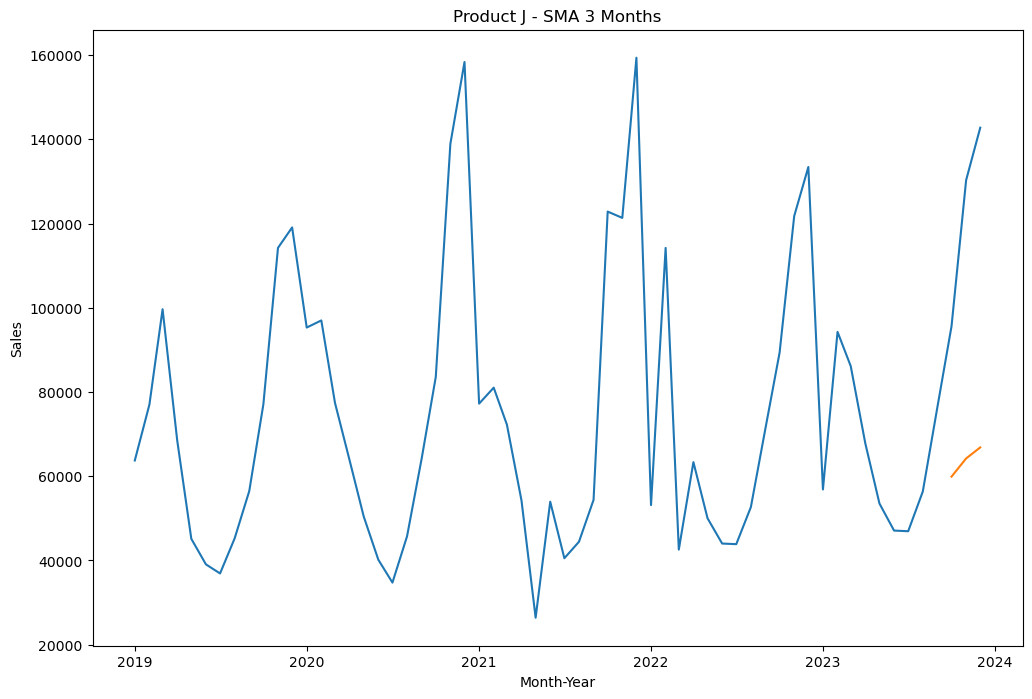

In [12]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_j['Sales'])
sns.lineplot(pred_3)
plt.title('Product J - SMA 3 Months')
plt.show()

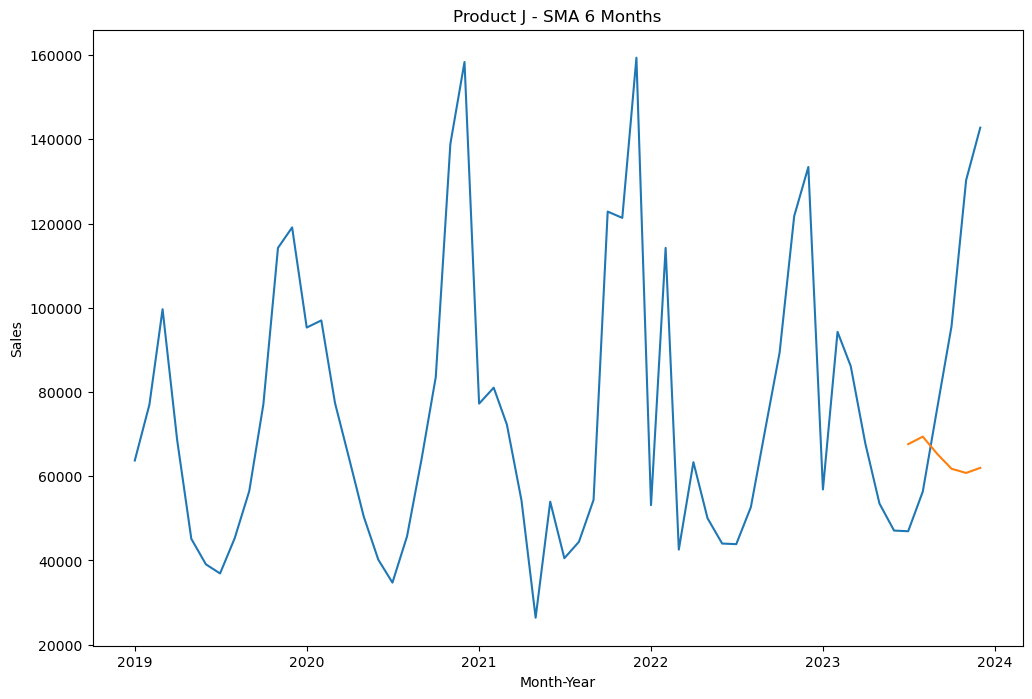

In [13]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_j['Sales'])
sns.lineplot(pred_6)
plt.title('Product J - SMA 6 Months')
plt.show()

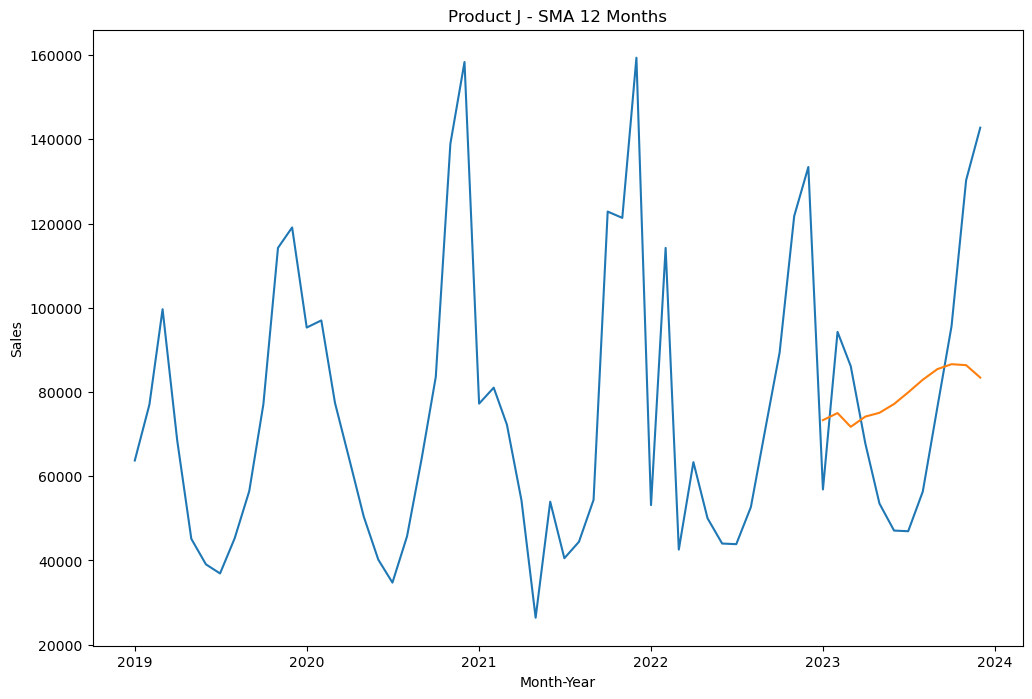

In [14]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_j['Sales'])
sns.lineplot(pred_12)
plt.title('Product J - SMA 12 Months')
plt.show()

In [16]:
SALES_J=  df.drop(['Product Name','Product Category','Month','Year', 'SMA_12months','SMA_6months','SMA_3months'],axis=1)

In [17]:
TRAIN=SALES_J[:48]

# Calculate the 12-month moving average for the last 12 months
sma_12 = TRAIN.rolling(window=12).mean().iloc[-1]

In [18]:
# Initialize a list to hold your predictions
predictions = [sma_12]

# Generate predictions for the next 12 months
for i in range(11):
    # Add the most recent prediction to the sales data
    TRAIN= TRAIN.append(predictions[-1])
    
    # Calculate the new moving average and add it to the predictions list
    predictions.append(TRAIN.rolling(window=12).mean().iloc[-1])

# Convert predictions to an array
# Convert predictions to an array
predictions = np.array(predictions)

# Print the predictions
print(predictions)

[[73305.66666667]
 [74987.38888889]
 [71718.9212963 ]
 [74148.91473765]
 [75050.24096579]
 [77137.76104627]
 [79899.24113346]
 [82903.01122792]
 [85423.09549691]
 [86592.02012166]
 [86362.77179846]
 [83412.16944833]]


C:\Users\Maaz\AppData\Local\Temp\ipykernel_76536\267905979.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_76536\267905979.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_76536\267905979.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_76536\267905979.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_76536\267

In [19]:
TEST=SALES_J[48:]
TEST['Predictions']=predictions

C:\Users\Maaz\AppData\Local\Temp\ipykernel_76536\1819017683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST['Predictions']=predictions


In [20]:
_mae_12= mean_absolute_error(TEST['Sales'],TEST['Predictions'])
_mse_12=mean_squared_error(TEST['Sales'],TEST['Predictions'])
_mape_12= mean_absolute_percentage_error(TEST['Sales'],TEST['Predictions'])
_rmse_12= np.sqrt(mean_squared_error(TEST['Sales'],TEST['Predictions']))

print(f'MAE - Moving Averages_12 months: {_mae_12:0.3f}')
print(f'MAPE - Moving Averages_12 months: {_mape_12:0.3f}')
print(f'MSE - Moving Averages_12 months: {_mse_12:0.3f}')
print(f'RMSE - Moving Averages_12 months: {_rmse_12:0.3f}')

MAE - Moving Averages_12 months: 24082.472
MAPE - Moving Averages_12 months: 0.328
MSE - Moving Averages_12 months: 805503058.647
RMSE - Moving Averages_12 months: 28381.386


In [21]:
TEST

,Sales,Predictions
Month-Year,,
2023-01-01,56843,73305.666667
2023-02-01,94268,74987.388889
2023-03-01,86135,71718.921296
2023-04-01,67767,74148.914738
2023-05-01,53500,75050.240966
2023-06-01,47080,77137.761046
2023-07-01,46924,79899.241133
2023-08-01,56348,82903.011228
2023-09-01,76393,85423.095497


In [22]:
TRAIN_6=SALES_J[:54]

# Calculate the 6-month moving average for the last 6 months
sma_6 = TRAIN_6.rolling(window=6).mean().iloc[-1]

In [23]:
# Initialize a list to hold your predictions
predictions_6 = [sma_6]

# Generate predictions for the next 6 months
for i in range(5):
    # Add the most recent prediction to the sales data
    TRAIN_6= TRAIN_6.append(predictions_6[-1])
    
    # Calculate the new moving average and add it to the predictions list
    predictions_6.append(TRAIN_6.rolling(window=6).mean().iloc[-1])

# Convert predictions to an array
# Convert predictions to an array
predictions_6 = np.array(predictions_6)

# Print the predictions
print(predictions_6)

[[67598.83333333]
 [69391.47222222]
 [65245.38425926]
 [61763.7816358 ]
 [60763.24524177]
 [61973.7861154 ]]


C:\Users\Maaz\AppData\Local\Temp\ipykernel_76536\135217546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_76536\135217546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_76536\135217546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_76536\135217546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\

In [24]:
TEST_6=SALES_J[54:]
TEST_6['Predictions_6']=predictions_6

C:\Users\Maaz\AppData\Local\Temp\ipykernel_76536\3746154002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST_6['Predictions_6']=predictions_6


In [25]:
_mae_6= mean_absolute_error(TEST_6['Sales'],TEST_6['Predictions_6'])
_mse_6=mean_squared_error(TEST_6['Sales'],TEST_6['Predictions_6'])
_mape_6= mean_absolute_percentage_error(TEST_6['Sales'],TEST_6['Predictions_6'])
_rmse_6= np.sqrt(mean_squared_error(TEST_6['Sales'],TEST_6['Predictions_6']))

print(f'MAE - Moving Averages_6 months: {_mae_6:0.3f}')
print(f'MAPE - Moving Averages_6 months: {_mape_6:0.3f}')
print(f'MSE - Moving Averages_6 months: {_mse_6:0.3f}')
print(f'RMSE - Moving Averages_6 months: {_rmse_6:0.3f}')

MAE - Moving Averages_6 months: 38168.685
MAPE - Moving Averages_6 months: 0.379
MSE - Moving Averages_6 months: 2204475224.137
RMSE - Moving Averages_6 months: 46951.839


In [26]:
TEST_6

,Sales,Predictions_6
Month-Year,,
2023-07-01,46924,67598.833333
2023-08-01,56348,69391.472222
2023-09-01,76393,65245.384259
2023-10-01,95597,61763.781636
2023-11-01,130293,60763.245242
2023-12-01,142757,61973.786115


In [27]:
TRAIN_3=SALES_J[:57]

# Calculate the 3-month moving average for the last 3 months
sma_3 = TRAIN_3.rolling(window=3).mean().iloc[-1]

In [28]:
# Initialize a list to hold your predictions
predictions_3 = [sma_3]

# Generate predictions 
for i in range(2):
    # Add the most recent prediction to the sales data
    TRAIN_3= TRAIN_3.append(predictions_3[-1])
    
    # Calculate the new moving average and add it to the predictions list
    predictions_3.append(TRAIN_3.rolling(window=3).mean().iloc[-1])

# Convert predictions to an array
# Convert predictions to an array
predictions_3 = np.array(predictions_3)

# Print the predictions
print(predictions_3)

[[59888.33333333]
 [64209.77777778]
 [66830.37037037]]


C:\Users\Maaz\AppData\Local\Temp\ipykernel_76536\3984739376.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_3= TRAIN_3.append(predictions_3[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_76536\3984739376.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_3= TRAIN_3.append(predictions_3[-1])


In [29]:
TEST_3=SALES_J[57:]
TEST_3['Predictions_3']=predictions_3

C:\Users\Maaz\AppData\Local\Temp\ipykernel_76536\4092046685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST_3['Predictions_3']=predictions_3


In [30]:
_mae_3= mean_absolute_error(TEST_3['Sales'],TEST_3['Predictions_3'])
_mse_3=mean_squared_error(TEST_3['Sales'],TEST_3['Predictions_3'])
_mape_3= mean_absolute_percentage_error(TEST_3['Sales'],TEST_3['Predictions_3'])
_rmse_3= np.sqrt(mean_squared_error(TEST_3['Sales'],TEST_3['Predictions_3']))

print(f'MAE - Simple Moving Averages_3 months: {_mae_3:0.3f}')
print(f'MAPE - Simple Moving Averages_3 months: {_mape_3:0.3f}')
print(f'MSE - Simple Moving Averages_3 months: {_mse_3:0.3f}')
print(f'RMSE - Simple Moving Averages_3 months: {_rmse_3:0.3f}')

MAE - Simple Moving Averages_3 months: 59239.506
MAPE - Simple Moving Averages_3 months: 0.471
MSE - Simple Moving Averages_3 months: 3802318073.766
RMSE - Simple Moving Averages_3 months: 61662.939


In [31]:
TEST_3

,Sales,Predictions_3
Month-Year,,
2023-10-01,95597,59888.333333
2023-11-01,130293,64209.777778
2023-12-01,142757,66830.370370
